<a href="https://colab.research.google.com/github/carsonSgit/colabs/blob/main/trademind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization - Loading The Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

DATASET_PATH = pathlib.Path("TradeMind/colab/all_stocks_5yr.csv")

if not DATASET_PATH.exists():
  !git clone https://github.com/carsonSgit/TradeMind.git
else:
  # > Runtime > Restart Session if changes were made to helper
  !cd TradeMind && git pull && cd ..

import sys
sys.path.append('TradeMind/colab')

from trade_mind_helpers import (
    get_training_data,
    get_company_by_symbol,
    plot_df_time_series
)

INDEX = pd.read_csv(DATASET_PATH)

Already up to date.


# Cleaning the data

In [ ]:
nan = INDEX.isna().any(axis=1)

# Get the index positions where NaN values are found
nan_indices = nan[nan].index
print(nan_indices)
# Loop through the found NaN indices
for i in nan_indices:
    start = max(i - 5, 0)  # Ensure start is not less than 0
    end = min(i + 5, len(INDEX))  # Ensure end does not exceed the length of the DataFrame

    # Select the surrounding rows, excluding the current NaN row
    surrounding_rows = INDEX.iloc[lambda idx: idx.index != i][start:end]
    print(surrounding_rows)
    # Compute the average, ignoring NaNs
    average_values = surrounding_rows.mean(skipna=True)

    # Replace NaN values in the row with the computed average
    INDEX.iloc[i].fillna(average_values, inplace=True)


Int64Index([ 82949, 165734, 165857, 205076, 239832, 434379, 434502, 478594,
            558213, 581906, 598236],
           dtype='int64')
             date     open     high    low    close  volume Name
82944  2017-07-19  67.9200  69.5100  67.80  68.9500    1805  BHF
82945  2017-07-20  69.7489  70.0000  69.00  69.0000   28390  BHF
82946  2017-07-21  70.0000  70.0000  68.56  68.9226    1562  BHF
82947  2017-07-24  69.0000  69.2900  69.00  69.0000    4650  BHF
82948  2017-07-25  69.1461  69.1461  68.95  69.0842    1362  BHF
82950  2017-07-27  69.2500  69.2500  68.00  68.0000   12970  BHF
82951  2017-07-28  67.2600  67.2600  67.26  67.2600     101  BHF
82952  2017-07-31  67.7000  67.7000  65.28  66.0000   19079  BHF
82953  2017-08-01  66.6500  66.8600  66.23  66.2500   26784  BHF
82954  2017-08-02  65.9800  66.0600  64.83  64.8900  112432  BHF
              date   open     high     low  close    volume Name
165729  2015-07-10  86.45  86.9200  86.060  86.65   4654491  DHR
165730  2015-07-

<ipython-input-54-5780c838bf63>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values = surrounding_rows.mean(skipna=True)
<ipython-input-54-5780c838bf63>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INDEX.iloc[i].fillna(average_values, inplace=True)
<ipython-input-54-5780c838bf63>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  

              date   open    high      low  close   volume Name
205071  2015-07-10  46.74  47.370  46.5400  46.89  1830731   ES
205072  2015-07-13  47.15  47.390  46.8101  47.04  1331709   ES
205073  2015-07-14  47.04  47.350  46.8901  47.30  1322030   ES
205074  2015-07-15  47.30  47.860  47.0700  47.72  1946767   ES
205075  2015-07-16  47.68  48.395  47.5800  48.30  1080411   ES
205077  2015-07-20  47.85  47.890  47.2100  47.58  1259910   ES
205078  2015-07-21  47.58  47.680  46.9300  47.52  1683311   ES
205079  2015-07-22  47.64  48.440  47.3600  47.83  3469064   ES
205080  2015-07-23  47.82  47.820  46.9600  47.35  2689144   ES
205081  2015-07-24  47.29  47.560  47.0400  47.21  2539368   ES
              date   open    high     low  close   volume Name
239827  2018-02-01  32.44  33.390  32.430  33.35  3552897  FTI
239828  2018-02-02  32.94  33.125  32.570  32.68  4313191  FTI
239829  2018-02-05  32.62  33.160  31.810  31.83  5812074  FTI
239830  2018-02-06  30.87  32.225  30.690  3

<ipython-input-54-5780c838bf63>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values = surrounding_rows.mean(skipna=True)
<ipython-input-54-5780c838bf63>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INDEX.iloc[i].fillna(average_values, inplace=True)
<ipython-input-54-5780c838bf63>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  

              date    open    high       low   close   volume  Name
478589  2015-06-02  511.25  512.95  505.2500  508.90   641752  REGN
478590  2015-06-03  509.64  514.91  508.7750  514.22   627927  REGN
478591  2015-06-04  510.84  519.80  510.1900  518.62   816693  REGN
478592  2015-06-05  519.40  539.80  516.8500  539.40  1205629  REGN
478593  2015-06-08  540.98  544.00  525.5600  526.09  1025896  REGN
478595  2015-06-10  505.73  513.73  498.6024  512.32  1810879  REGN
478596  2015-06-11  513.29  514.85  499.9000  501.10  1115595  REGN
478597  2015-06-12  499.44  500.78  490.8680  492.29   983899  REGN
478598  2015-06-15  490.11  499.90  482.9175  499.06  1302585  REGN
478599  2015-06-16  498.18  505.15  497.0654  501.76   639015  REGN
              date   open     high      low  close   volume Name
558208  2018-02-01  67.22  67.9500  66.2300  67.15  5603314  UAL
558209  2018-02-02  66.63  66.8900  65.4800  65.68  4189758  UAL
558210  2018-02-05  65.00  65.4400  63.2811  63.40  54338

<ipython-input-54-5780c838bf63>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values = surrounding_rows.mean(skipna=True)
<ipython-input-54-5780c838bf63>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INDEX.iloc[i].fillna(average_values, inplace=True)
<ipython-input-54-5780c838bf63>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  

In [ ]:
nan = INDEX.iloc[82949]
nan

date      2017-07-26
open             NaN
high             NaN
low              NaN
close        69.0842
volume             3
Name             BHF
Name: 82949, dtype: object

# Training The Model

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

train_df, test_df = get_training_data(INDEX)

scaler = MinMaxScaler()
scaled_data_train = scaler.fit_transform(train_df[['close', 'volume', 'open']])
scaled_data_test = scaler.fit_transform(test_df[['close', 'volume', 'open']])
# test_df[['open', 'high', 'low', 'close', 'volume']] open high and low have nan values

steps = 10 # tweak [closing price, closing price, closing price 3] = [closing price 3]

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='tanh', input_shape=(steps, 3), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])

def create_sequences(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps), :])
        y.append(data[i + steps, 0])  # Assuming 'close' is at index 0
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(scaled_data_train, steps)
X_test, y_test = create_sequences(scaled_data_test, steps)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=10, # tweak
    batch_size=32, # tweak
    validation_split=0.1 # Look into / tweak
)

Epoch 1/10
 1227/15383 [=>............................] - ETA: 2:58 - loss: nan - mae: nan

KeyboardInterrupt: 

# Model Metrics

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.preprocessing import MinMaxScaler

model_path = pathlib.Path("TradeMind/colab/models/mark_2.keras")
model = load_model(model_path)

steps = 10

test_df = get_training_data(INDEX)[1]

scaler = MinMaxScaler()
scaled_data_test = scaler.fit_transform(test_df[['close', 'volume']])

def create_sequences(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps), :])
        y.append(data[i + steps, 0])  # Assuming 'close' is at index 0
    return np.array(X), np.array(y)

X_test, y_test = create_sequences(scaled_data_test, steps)

### Mean Absolute Error (MAE)
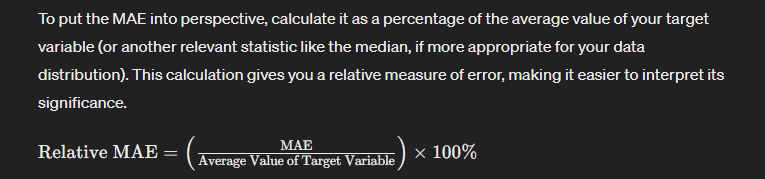




In [ ]:

average_close_price_test = test_df['close'].mean()

mae = model.evaluate(X_test, y_test, verbose=0)[1]

print(f'MAE: {mae:.4f}')
print(f'Average Close Price in Test Set: {average_close_price_test:.2f}')
print(f'MAE as Percentage of Average Close Price: {(mae/average_close_price_test) * 100:.4f}%')
model.save('mark_2.keras')


MAE: 0.0020
Average Close Price in Test Set: 103.87
MAE as Percentage of Average Close Price: 0.0019%
